 # Feature Matching
 * Q - what is feature mtching ?
 * A - Those methodologies enable us to extract key features from an input image.
 
 * Q - How ?
 * A - Mosly using some of the technics we have learned in previous lessons (corner, edge & contour detection), and than using distance calculation finds all the matches in the secondary image.
 
 * Q - What is the difference from template matching ?
 * A - When using template matching we find exact copy of the template on the target image, while in Feature matching we detect diffreret sizes and angles of the shape we are looking for in the target image
 
 # Basic concepts
 * Keypoint - are points of interest
   - selected by particular image property around it (e.g. corner)
   - different algorithns for detection (e.g. ORB, SIFT, SURF)
 * Descriptors
   - a finite vector that summarizes properties of a key point
   - used for classifying the key point
   - see https://gilscvblog.com/2013/08/18/a-short-introduction-to-descriptors/
 * Feture - keypoint + its descriptor
   - different algorithms use different methods to determine a feature 
   - can be tracked over time
 

### We will go over 3 different methods:
* Brute-Force matching with ORB descriptors
* Brute-Force matching with SIFT descriptors and ratio test (explained https://www.youtube.com/watch?v=dlqn-wPvjxg)
* FLANN based matcher (it is based on the SIFT local feature detection)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

### The images we will be using 

In [3]:
item = cv2.imread('images/item.jpg',cv2.IMREAD_GRAYSCALE)

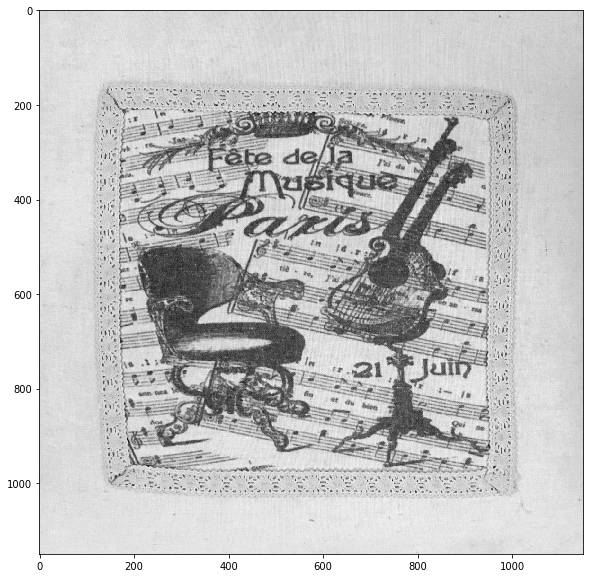

In [4]:
display(item)

In [5]:
big_picture = cv2.imread('images/big_picture.jpg',cv2.IMREAD_GRAYSCALE)

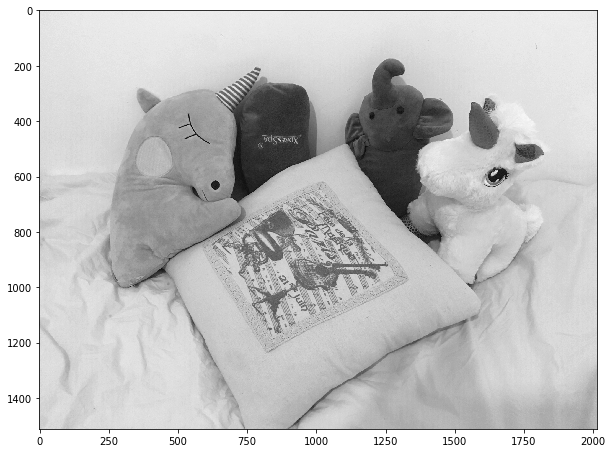

In [6]:
display(big_picture)

# key points on ORB & SIFT

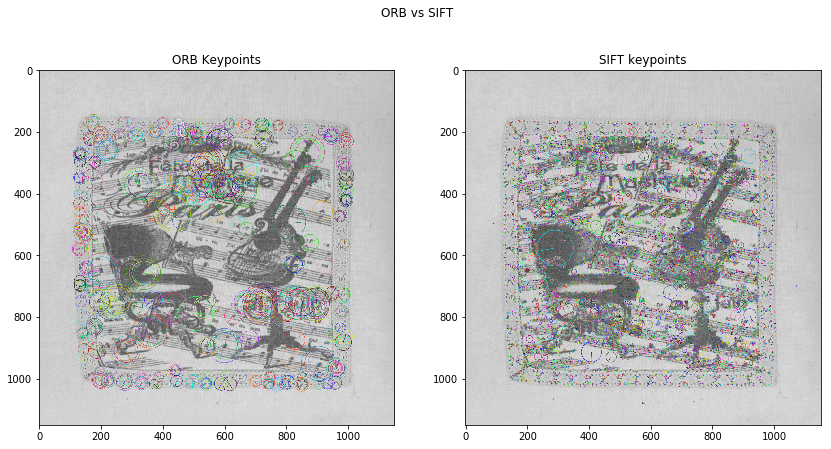

In [7]:
item_okp = cv2.imread('images/item.jpg')
item_skp = item_okp.copy()
#draw_flag = cv2.DRAW_MATCHES_FLAGS_DEFAULT
draw_flag = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS

#Create ORB detector object
orb = cv2.ORB_create()
# find the keypoints and descriptors with 
okp, odes = orb.detectAndCompute(item,None)
#Draw the ORB keypoints
oretval =  cv2.drawKeypoints(image=item, keypoints=okp, outImage=item_okp, flags=draw_flag)


#Create SIFT Detector object
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
skp, sdes = sift.detectAndCompute(item,None)
oretval =  cv2.drawKeypoints(image=item, keypoints=skp, outImage=item_skp, flags=draw_flag)

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(item_okp)
plt.title('ORB Keypoints')
    
plt.subplot(122)
plt.imshow(item_skp)
plt.title('SIFT keypoints')
plt.suptitle("ORB vs SIFT")
plt.show()


# Brute Force Detection with ORB Descriptors

In [8]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(item,None)
kp2, des2 = orb.detectAndCompute(big_picture,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
item_matches = cv2.drawMatches(item,kp1,big_picture,kp2,matches[:50],None,flags=2)

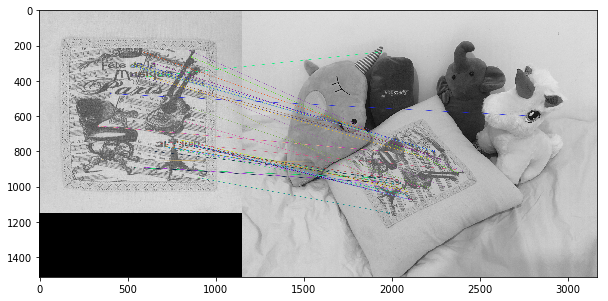

In [9]:
display(item_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [10]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(item,None)
kp2, des2 = sift.detectAndCompute(big_picture,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

print("{} good matches found".format(len(good)))
        
# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(item,kp1,big_picture,kp2,good,None,flags=2)

1299 good matches found


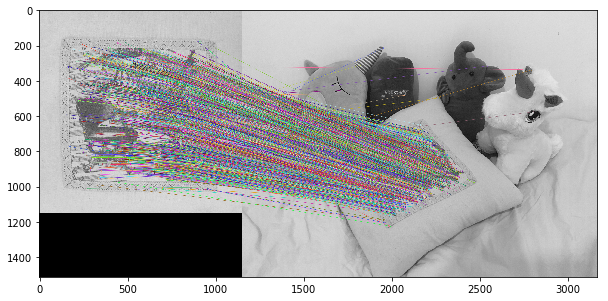

In [11]:
display(sift_matches)

# FLANN based Matcher

In [12]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(item,None)
kp2, des2 = sift.detectAndCompute(big_picture,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])

print("{} good matches found".format(len(good)))
        
flann_matches = cv2.drawMatchesKnn(item,kp1,big_picture,kp2,good,None,flags=0)

1299 good matches found


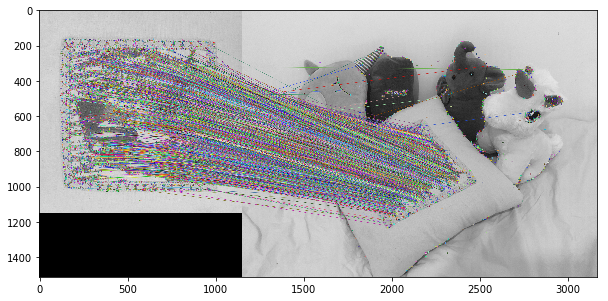

In [13]:
display(flann_matches)